Projet : Accident de la route
==============

## Etape 3 : Modélisation

### Import des données

In [2]:
# import des librairies
import pandas as pd
pd.set_option('display.max_columns', None)
pd.options.display.max_info_columns

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#from lazypredict.supervised import LazyClassifier
from lazypredict.Supervised import LazyClassifier

import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix,classification_report, f1_score, accuracy_score, recall_score, precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate

import sys
import joblib
from xgboost import XGBClassifier
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:

print("Version de Python:", sys.version)
print("Version de pandas:", pd.__version__)
print("Version de scikit-learn:", sklearn.__version__)
print("Version de pandas:", np.__version__)


Version de Python: 3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]
Version de pandas: 2.1.4
Version de scikit-learn: 1.2.2
Version de pandas: 1.26.3


In [4]:
# import du dataset
df = pd.read_csv("dataset/dataset_final.csv")
df.head()

,place,catu,grav,sexe,trajet,secu1,locp,catr,circ,nbv,vosp,prof,plan,surf,infra,situ,vma,lum,com,agg,int,atm,col,lat,long,senc,catv,obs,obsm,choc,manv,motor,age_group,h_group,weekday
0,1,1,1,1,5,1,-1,4,2,2,0,1,1,1,0,1,50,1,26198,2,3,1,3,44.56,4.73,1,3,0,2,1,9,1,2,6,2
1,1,1,0,1,5,1,-1,4,2,2,0,1,1,1,0,1,50,1,26198,2,3,1,3,44.56,4.73,1,6,0,2,2,1,1,7,6,2
2,1,1,1,1,9,1,0,4,2,2,0,1,1,1,0,1,50,1,25204,2,3,1,3,46.93,6.35,2,6,0,2,8,15,1,4,3,3
3,1,1,0,1,4,1,0,4,2,2,0,1,1,1,0,1,50,1,25204,2,3,1,3,46.93,6.35,2,5,0,2,1,1,1,6,3,3
4,1,1,0,1,0,1,-1,3,-1,2,0,1,1,1,5,1,50,1,22360,2,6,1,2,48.49,-2.76,2,6,0,2,1,2,1,3,6,3


### Séparation des données

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(["grav"], axis=1), df.grav, test_size=0.2)
print("Séparation des labels et targets :", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Séparation des labels et targets : (365142, 34) (91286, 34) (365142,) (91286,)


### Aperçu  de la performance relative des différents modèles de classification


In [8]:

models_list = [AdaBoostClassifier,XGBClassifier,LGBMClassifier,KNeighborsClassifier, ExtraTreesClassifier]


In [9]:
# Initialiser LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None,
                     predictions=True, classifiers=models_list)

# Entrainer et évaluer les modèles
models_train, predictions_train = clf.fit(X_train, X_test, y_train, y_test)
models_test, predictions_test = clf.fit(X_train, X_test, y_train, y_test)
# Afficher les résultats
print(models_list)


 40%|████      | 2/5 [00:15<00:19,  6.53s/it]

[LightGBM] [Info] Number of positive: 212727, number of negative: 152415
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012810 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1068
[LightGBM] [Info] Number of data points in the train set: 365142, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.582587 -> initscore=0.333403
[LightGBM] [Info] Start training from score 0.333403


100%|██████████| 5/5 [01:12<00:00, 14.43s/it]


'tuple' object has no attribute '__name__'
Invalid Classifier(s)


 40%|████      | 2/5 [00:14<00:19,  6.34s/it]

[LightGBM] [Info] Number of positive: 212727, number of negative: 152415
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010598 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1068
[LightGBM] [Info] Number of data points in the train set: 365142, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.582587 -> initscore=0.333403
[LightGBM] [Info] Start training from score 0.333403


100%|██████████| 5/5 [01:12<00:00, 14.60s/it]

[<class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>, <class 'xgboost.sklearn.XGBClassifier'>, <class 'lightgbm.sklearn.LGBMClassifier'>, <class 'sklearn.neighbors._classification.KNeighborsClassifier'>, <class 'sklearn.ensemble._forest.ExtraTreesClassifier'>]


In [10]:
models_train

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.81,0.81,0.81,0.81,1.30
LGBMClassifier,0.81,0.80,0.80,0.81,1.21
ExtraTreesClassifier,0.81,0.80,0.80,0.81,45.58
AdaBoostClassifier,0.79,0.78,0.78,0.79,14.01
KNeighborsClassifier,0.75,0.75,0.75,0.75,10.05


In [11]:
# Sauvegarder les résultats
#joblib.dump(models, 'models_saved/lazy_classifier.joblib')

#joblib.dump(models_train, 'models_saved/lazy_classifier.joblib')

In [12]:
import os
import joblib

# Assurez-vous que le dossier existe
if not os.path.exists('models_saved'):
    os.makedirs('models_saved')

# Sauvegardez le modèle
joblib.dump(models_train, 'models_saved/lazy_classifier.joblib')

['models_saved/lazy_classifier.joblib']

In [13]:
# standardisation
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Modélisation

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Meilleurs paramètres trouvés: {'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 800}
Meilleur score de validation croisée: 0.8129549565509319
Matrice de confusion :
 [[30016  8021]
 [11398 41851]]


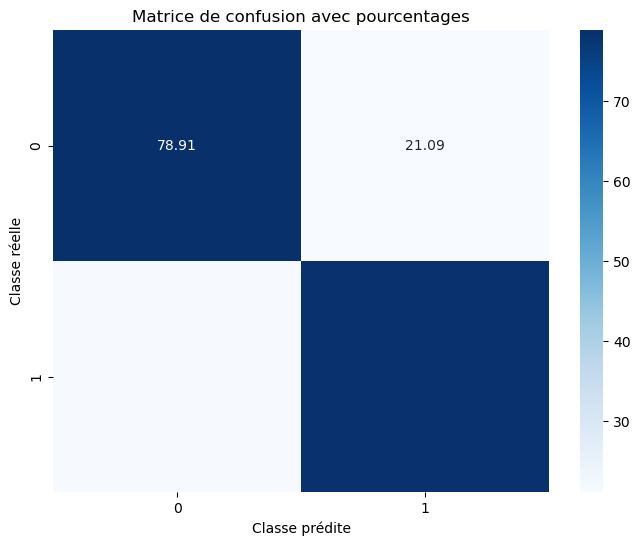

In [15]:
# model adaboost

hp_ada = {
    'n_estimators': [600, 700, 800],        # Nombre de classificateurs faibles
    'learning_rate': [0.01, 0.1],     # Taux d'apprentissage : ajuste la contribution de chaque classificateur faible à la prédiction finale
    'algorithm': ['SAMME.R']      # Algorithme utilisé: 'SAMME.R'
}

dtc = DecisionTreeClassifier(random_state=42, max_depth=1)

gs_ada= GridSearchCV(estimator=AdaBoostClassifier(random_state=42, estimator=dtc),
                     param_grid=hp_ada,
                           cv = 5,  # Nombre de folds pour la validation croisée
                           verbose = 3, # Affiche le degré de détail des calculs
                           refit=True, # réentraine le modèle avec toutes les données
                           scoring="f1",
                           n_jobs = -1)  # Utiliser etous les cours du CPU

gs_ada.fit(X_train_scaled, y_train)

best_hp_ada = gs_ada.best_params_
best_score_ada = gs_ada.best_score_
best_estimator_ada = gs_ada.best_estimator_

print("Meilleurs paramètres trouvés:", best_hp_ada)
print("Meilleur score de validation croisée:", best_score_ada)

y_pred_ada = best_estimator_ada.predict(X_test_scaled)

cm_ada = confusion_matrix(y_test, y_pred_ada)
print("Matrice de confusion :\n", cm_ada)

row_sums_ada = cm_ada.sum(axis = 1)
cm_percent_ada = (cm_ada.T / row_sums_ada).T * 100

plt.figure(figsize=(8, 6))
sns.heatmap(cm_percent_ada, annot = True, fmt = ".2f", cmap = "Blues")
plt.xlabel('Classe prédite')
plt.ylabel('Classe réelle')
plt.title('Matrice de confusion avec pourcentages')
plt.show();

### Sauvegarde du modèle

In [17]:
# Sauvegarder le modèle
joblib.dump(best_estimator_ada, 'models_saved/best_estimator_ada_model.joblib')

['models_saved/best_estimator_ada_model.joblib']

### Modèle ExtraTreesClassifier

In [19]:
# ExtraTreesClassifier

# Initialiser et entraîner le modèle ExtraTreesClassifier
et_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)
et_clf.fit(X_train, y_train)

# Prédire les valeurs pour l'ensemble de test
y_pred_extrTr = et_clf.predict(X_test)

# Évaluer le modèle
accuracy_et = accuracy_score(y_test, y_pred_extrTr)
report_et = classification_report(y_test, y_pred_extrTr)

# Afficher les résultats
print(f"ExtraTreesClassifier Accuracy: {accuracy_et:.2f}")
print("\nClassification Report:")
print(report_et)

ExtraTreesClassifier Accuracy: 0.81

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.79      0.77     38037
           1       0.84      0.82      0.83     53249

    accuracy                           0.81     91286
   macro avg       0.80      0.80      0.80     91286
weighted avg       0.81      0.81      0.81     91286



In [20]:
# Sauvegarder le modèle
joblib.dump(et_clf, 'models_saved/extra_tree_classifier_model.joblib')

['models_saved/extra_tree_classifier_model.joblib']

### Modèle XGBClassifier

In [22]:
# XGBClassifier

# Initialiser et entraîner le modèle XGBClassifier
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train, y_train)

# Prédire les valeurs pour l'ensemble de test
y_pred_xgb = xgb_clf.predict(X_test)

# Évaluer le modèle
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)
# Afficher les résultats
print(f"XGBClassifier Accuracy: {accuracy_xgb:.2f}")
print("\nClassification Report:")
print(report_xgb)

XGBClassifier Accuracy: 0.81

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.78      0.78     38037
           1       0.84      0.83      0.84     53249

    accuracy                           0.81     91286
   macro avg       0.81      0.81      0.81     91286
weighted avg       0.81      0.81      0.81     91286



In [23]:
# Sauvegarder le modèle
joblib.dump(xgb_clf, 'models_saved/GBClassifier_model.joblib')

['models_saved/GBClassifier_model.joblib']

### Modèle LGBMClassifier

In [25]:
# LGBMClassifier

# LightGBM : lightgbm.LGBMClassifier
# Initialiser et entraîner le modèle LightGBM
lig_clf = LGBMClassifier(use_label_encoder=False, eval_metric='logloss')
lig_clf.fit(X_train, y_train)

# Prédire les valeurs pour l'ensemble de test
y_pred_lgbm = lig_clf.predict(X_test)

# Évaluer le modèle
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
report_lgbm = classification_report(y_test, y_pred_lgbm)

# Afficher les résultats
print(f"LGBMClassifier Accuracy: {accuracy_lgbm:.2f}")
print("\nClassification Report:")
print(report_lgbm)

[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Info] Number of positive: 212727, number of negative: 152415
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013834 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1056
[LightGBM] [Info] Number of data points in the train set: 365142, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.582587 -> initscore=0.333403
[LightGBM] [Info] Start training from score 0.333403
[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
LGBMClassifier Accuracy: 0.81

Classification Report:
              precision    recall  f1-score   support

  

In [26]:
# Sauvegarder le modèle
joblib.dump(lig_clf, 'models_saved/LGBMClassifier_model.joblib')

['models_saved/LGBMClassifier_model.joblib']

### Modèle KNeighborsClassifier

In [28]:
# # KNeighborsClassifier

# # Initialiser et entraîner le modèle KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)

 # Prédire les valeurs pour l'ensemble de test
y_pred_knn = knn_clf.predict(X_test)

# # Évaluer le modèle
accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)

# # Afficher les résultats
print(f"KNeighborsClassifier Accuracy: {accuracy_knn:.2f}")
print("\nClassification Report:")
print(report_knn)

KNeighborsClassifier Accuracy: 0.65

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.63      0.60     38037
           1       0.72      0.67      0.69     53249

    accuracy                           0.65     91286
   macro avg       0.65      0.65      0.65     91286
weighted avg       0.66      0.65      0.65     91286



In [29]:
# Sauvegarder le modèle
joblib.dump(knn_clf, 'models_saved/KNeighborsClassifier_model.joblib')

['models_saved/KNeighborsClassifier_model.joblib']

### Cross Validation

In [31]:
X = df.drop(['trajet','age_group', 'long', 'motor', 'vosp', 'lum', 'agg', 'com', 'situ','grav', 'infra', 'surf', 'plan', 'circ', 'atm', 'senc', 'int', 'prof', 'nbv', 'weekday'], axis=1)
y = df.grav

In [32]:
# Cross validation - XGBClassifier - KFold = 5

# Initialisation du modèle
model_xgbc = XGBClassifier()

# Configuration de la validation croisée K-Fold
kf_xgbc = KFold(n_splits=5, shuffle=True, random_state=42)

# Évaluation du modèle avec la validation croisée
scores_xgbc = cross_val_score(model_xgbc, X, y, cv=kf_xgbc)
std_score_xgbc = np.std(scores_xgbc)    # Écart-type des scores
print("Scores de validation croisée : ", scores_xgbc)
print("Score moyen : ", scores_xgbc.mean())
print("Ecart type  : ", std_score_xgbc)

Scores de validation croisée :  [0.80976272 0.8086344  0.80788949 0.80954155 0.81061511]
Score moyen :  0.8092886535868639
Ecart type  :  0.0009416876404237049


In [33]:
# Cross validation - AdaBoostClassifier

# Initialisation du modèle
model_ada = AdaBoostClassifier()

# Configuration de la validation croisée K-Fold
kf_ada = KFold(n_splits=5, shuffle=True, random_state=42)

# Évaluation du modèle avec la validation croisée
scores_ada = cross_val_score(model_ada, X, y, cv=kf_ada)
std_score_ada = np.std(scores_ada)    # Écart-type des scores
print("Scores de validation croisée : ", scores_ada)
print("Score moyen : ", scores_ada.mean())
print("Ecart type moyen : ", std_score_ada)

Scores de validation croisée :  [0.78783165 0.78836842 0.78789738 0.78666813 0.78867284]
Score moyen :  0.787887683414686
Ecart type moyen :  0.0006838318929365241


In [34]:
# Cross validation - ExtraTreesClassifier

# Initialisation du modèle
model_et = ExtraTreesClassifier()

# Configuration de la validation croisée K-Fold
kf_et = KFold(n_splits=5, shuffle=True, random_state=42)

# Évaluation du modèle avec la validation croisée
scores_et = cross_val_score(model_et, X, y, cv=kf_et)
std_score_et = np.std(scores_et)    # Écart-type des scores
print("Scores de validation croisée : ", scores_et)
print("Score moyen : ", scores_et.mean())
print("Ecart type moyen : ", std_score_et)

Scores de validation croisée :  [0.77768771 0.77797253 0.77582543 0.77909843 0.78021581]
Score moyen :  0.7781599792174827
Ecart type moyen :  0.001470743148405218


In [35]:
# Cross validation - LGBMClassifier

# Initialisation du modèle
model_lgbm = LGBMClassifier()

# Configuration de la validation croisée K-Fold
kf_lgbm = KFold(n_splits=5, shuffle=True, random_state=42)

# Évaluation du modèle avec la validation croisée
scores_lgbm = cross_val_score(model_lgbm, X, y, cv=kf_lgbm)
std_score_lgbm = np.std(scores_lgbm)    # Écart-type des scores
print("Scores de validation croisée : ", scores_lgbm)
print("Score moyen : ", scores_lgbm.mean())
print("Ecart type moyen : ", std_score_lgbm)


[LightGBM] [Info] Number of positive: 212681, number of negative: 152461
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008107 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 414
[LightGBM] [Info] Number of data points in the train set: 365142, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.582461 -> initscore=0.332885
[LightGBM] [Info] Start training from score 0.332885
[LightGBM] [Info] Number of positive: 212676, number of negative: 152466
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007164 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 413
[LightGBM] [Info] Number of data points in the train set: 365142, number of used features: 15
[LightGBM] [Info

### Comparaison des scores pour chaque modèle

In [37]:
ada_model = joblib.load('models_saved/best_estimator_ada_model.joblib')
et_model = joblib.load('models_saved/extra_tree_classifier_model.joblib')
xgbc_model = joblib.load('models_saved/GBClassifier_model.joblib')
lgbm_model = joblib.load('models_saved/LGBMClassifier_model.joblib')
knn_model = joblib.load('models_saved/KNeighborsClassifier_model.joblib')

models = {
    'AdaBoostClassifier': ada_model,
    'ExtraTreesClassifier': et_model,
    'XGBClassifier': xgbc_model,
    'LGBMClassifier' : lgbm_model,
   'KNeighborsClassifier' : knn_model
   }

# Liste pour stocker les résultats
results = []

for name, model in models.items():
    results_pred = model.predict(X_test)
    
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, results_pred),
        'Ecart_type': np.std(results_pred),
        'f1_score': f1_score(y_test, results_pred),
        'recall_score' : recall_score(y_test, results_pred),
        'precision_score' : precision_score(y_test, results_pred)
            })
   
results_df = pd.DataFrame(results)

# Afficher le résultat
results_df

[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric


,Model,Accuracy,Ecart_type,f1_score,recall_score,precision_score
0,AdaBoostClassifier,0.59,0.08,0.74,1.00,0.58
1,ExtraTreesClassifier,0.81,0.50,0.83,0.82,0.84
2,XGBClassifier,0.81,0.49,0.84,0.83,0.84
3,LGBMClassifier,0.81,0.49,0.83,0.83,0.84
4,KNeighborsClassifier,0.65,0.50,0.69,0.67,0.72


### Analyse des résultats

In [39]:
y_pred_ada = ada_model.predict(X_test)
y_pred_et = et_model.predict(X_test)
y_pred_xgbc = xgbc_model.predict(X_test)
y_pred_lgbm = lgbm_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)

[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric


In [40]:
# création d'un df pour ajouter les prédictions au dataset
df_filtered = df.iloc[:len(y_test)]

df_filtered['gravite'] = df['grav']
df_filtered = df_filtered.drop(['grav'], axis=1)

df_filtered['pred_ada'] = y_pred_ada
df_filtered['pred_extrTr'] = y_pred_et
df_filtered['pred_xgb'] = y_pred_xgbc
df_filtered['pred_lgbm'] = y_pred_lgbm
df_filtered['pred_knn'] = y_pred_knn
df_filtered.head()

,place,catu,sexe,trajet,secu1,locp,catr,circ,nbv,vosp,prof,plan,surf,infra,situ,vma,lum,com,agg,int,atm,col,lat,long,senc,catv,obs,obsm,choc,manv,motor,age_group,h_group,weekday,gravite,pred_ada,pred_extrTr,pred_xgb,pred_lgbm,pred_knn
0,1,1,1,5,1,-1,4,2,2,0,1,1,1,0,1,50,1,26198,2,3,1,3,44.56,4.73,1,3,0,2,1,9,1,2,6,2,1,1,1,1,1,1
1,1,1,1,5,1,-1,4,2,2,0,1,1,1,0,1,50,1,26198,2,3,1,3,44.56,4.73,1,6,0,2,2,1,1,7,6,2,0,1,1,1,1,1
2,1,1,1,9,1,0,4,2,2,0,1,1,1,0,1,50,1,25204,2,3,1,3,46.93,6.35,2,6,0,2,8,15,1,4,3,3,1,1,0,0,0,1
3,1,1,1,4,1,0,4,2,2,0,1,1,1,0,1,50,1,25204,2,3,1,3,46.93,6.35,2,5,0,2,1,1,1,6,3,3,0,1,0,0,0,1
4,1,1,1,0,1,-1,3,-1,2,0,1,1,1,5,1,50,1,22360,2,6,1,2,48.49,-2.76,2,6,0,2,1,2,1,3,6,3,0,1,1,1,1,0


In [41]:
# création d'un df qui affiche toutes les prédictions qui ne sont pas identiques au réel
df_mismatch_ada = df_filtered[df_filtered['gravite'] != df_filtered['pred_ada']]
df_mismatch_ada.head()

,place,catu,sexe,trajet,secu1,locp,catr,circ,nbv,vosp,prof,plan,surf,infra,situ,vma,lum,com,agg,int,atm,col,lat,long,senc,catv,obs,obsm,choc,manv,motor,age_group,h_group,weekday,gravite,pred_ada,pred_extrTr,pred_xgb,pred_lgbm,pred_knn
1,1,1,1,5,1,-1,4,2,2,0,1,1,1,0,1,50,1,26198,2,3,1,3,44.56,4.73,1,6,0,2,2,1,1,7,6,2,0,1,1,1,1,1
3,1,1,1,4,1,0,4,2,2,0,1,1,1,0,1,50,1,25204,2,3,1,3,46.93,6.35,2,5,0,2,1,1,1,6,3,3,0,1,0,0,0,1
4,1,1,1,0,1,-1,3,-1,2,0,1,1,1,5,1,50,1,22360,2,6,1,2,48.49,-2.76,2,6,0,2,1,2,1,3,6,3,0,1,1,1,1,0
5,1,1,2,9,1,-1,3,-1,2,0,1,1,1,5,1,50,1,22360,2,6,1,2,48.49,-2.76,1,6,0,2,4,2,1,4,6,3,1,0,0,0,0,1
6,1,1,2,0,1,-1,4,1,1,0,2,1,1,0,1,30,1,16102,2,3,8,6,45.69,-0.33,2,6,0,1,3,16,1,3,6,3,0,1,1,0,0,0


In [42]:
# création d'un df qui affiche toutes les prédictions qui ne sont pas identiques au réel
df_mismatch = df_filtered[df_filtered['gravite'] != df_filtered['pred_extrTr']]
df_mismatch.head()

,place,catu,sexe,trajet,secu1,locp,catr,circ,nbv,vosp,prof,plan,surf,infra,situ,vma,lum,com,agg,int,atm,col,lat,long,senc,catv,obs,obsm,choc,manv,motor,age_group,h_group,weekday,gravite,pred_ada,pred_extrTr,pred_xgb,pred_lgbm,pred_knn
1,1,1,1,5,1,-1,4,2,2,0,1,1,1,0,1,50,1,26198,2,3,1,3,44.56,4.73,1,6,0,2,2,1,1,7,6,2,0,1,1,1,1,1
2,1,1,1,9,1,0,4,2,2,0,1,1,1,0,1,50,1,25204,2,3,1,3,46.93,6.35,2,6,0,2,8,15,1,4,3,3,1,1,0,0,0,1
4,1,1,1,0,1,-1,3,-1,2,0,1,1,1,5,1,50,1,22360,2,6,1,2,48.49,-2.76,2,6,0,2,1,2,1,3,6,3,0,1,1,1,1,0
5,1,1,2,9,1,-1,3,-1,2,0,1,1,1,5,1,50,1,22360,2,6,1,2,48.49,-2.76,1,6,0,2,4,2,1,4,6,3,1,0,0,0,0,1
6,1,1,2,0,1,-1,4,1,1,0,2,1,1,0,1,30,1,16102,2,3,8,6,45.69,-0.33,2,6,0,1,3,16,1,3,6,3,0,1,1,0,0,0


In [43]:
# création d'un df qui affiche toutes les prédictions qui ne sont pas identiques au réel
df_mismatch = df_filtered[df_filtered['gravite'] != df_filtered['pred_xgb']]
df_mismatch.head()

,place,catu,sexe,trajet,secu1,locp,catr,circ,nbv,vosp,prof,plan,surf,infra,situ,vma,lum,com,agg,int,atm,col,lat,long,senc,catv,obs,obsm,choc,manv,motor,age_group,h_group,weekday,gravite,pred_ada,pred_extrTr,pred_xgb,pred_lgbm,pred_knn
1,1,1,1,5,1,-1,4,2,2,0,1,1,1,0,1,50,1,26198,2,3,1,3,44.56,4.73,1,6,0,2,2,1,1,7,6,2,0,1,1,1,1,1
2,1,1,1,9,1,0,4,2,2,0,1,1,1,0,1,50,1,25204,2,3,1,3,46.93,6.35,2,6,0,2,8,15,1,4,3,3,1,1,0,0,0,1
4,1,1,1,0,1,-1,3,-1,2,0,1,1,1,5,1,50,1,22360,2,6,1,2,48.49,-2.76,2,6,0,2,1,2,1,3,6,3,0,1,1,1,1,0
5,1,1,2,9,1,-1,3,-1,2,0,1,1,1,5,1,50,1,22360,2,6,1,2,48.49,-2.76,1,6,0,2,4,2,1,4,6,3,1,0,0,0,0,1
10,1,1,1,4,1,0,3,3,4,0,1,1,1,0,1,50,1,13056,2,2,1,3,43.41,5.05,1,5,0,1,3,15,1,4,5,3,0,1,1,1,1,0


In [44]:
# création d'un df qui affiche toutes les prédictions qui ne sont pas identiques au réel
df_mismatch = df_filtered[df_filtered['gravite'] != df_filtered['pred_lgbm']]
df_mismatch.head()

,place,catu,sexe,trajet,secu1,locp,catr,circ,nbv,vosp,prof,plan,surf,infra,situ,vma,lum,com,agg,int,atm,col,lat,long,senc,catv,obs,obsm,choc,manv,motor,age_group,h_group,weekday,gravite,pred_ada,pred_extrTr,pred_xgb,pred_lgbm,pred_knn
1,1,1,1,5,1,-1,4,2,2,0,1,1,1,0,1,50,1,26198,2,3,1,3,44.56,4.73,1,6,0,2,2,1,1,7,6,2,0,1,1,1,1,1
2,1,1,1,9,1,0,4,2,2,0,1,1,1,0,1,50,1,25204,2,3,1,3,46.93,6.35,2,6,0,2,8,15,1,4,3,3,1,1,0,0,0,1
4,1,1,1,0,1,-1,3,-1,2,0,1,1,1,5,1,50,1,22360,2,6,1,2,48.49,-2.76,2,6,0,2,1,2,1,3,6,3,0,1,1,1,1,0
5,1,1,2,9,1,-1,3,-1,2,0,1,1,1,5,1,50,1,22360,2,6,1,2,48.49,-2.76,1,6,0,2,4,2,1,4,6,3,1,0,0,0,0,1
7,10,3,2,5,2,1,4,1,1,0,2,1,1,0,1,30,1,16102,2,3,8,6,45.69,-0.33,2,6,0,1,3,16,1,6,6,3,1,1,1,1,0,1


In [45]:
# création d'un df qui affiche toutes les prédictions qui ne sont pas identiques au réel
df_mismatch = df_filtered[df_filtered['gravite'] != df_filtered['pred_knn']]
df_mismatch.head()

,place,catu,sexe,trajet,secu1,locp,catr,circ,nbv,vosp,prof,plan,surf,infra,situ,vma,lum,com,agg,int,atm,col,lat,long,senc,catv,obs,obsm,choc,manv,motor,age_group,h_group,weekday,gravite,pred_ada,pred_extrTr,pred_xgb,pred_lgbm,pred_knn
1,1,1,1,5,1,-1,4,2,2,0,1,1,1,0,1,50,1,26198,2,3,1,3,44.56,4.73,1,6,0,2,2,1,1,7,6,2,0,1,1,1,1,1
3,1,1,1,4,1,0,4,2,2,0,1,1,1,0,1,50,1,25204,2,3,1,3,46.93,6.35,2,5,0,2,1,1,1,6,3,3,0,1,0,0,0,1
12,1,1,1,0,1,0,4,1,1,0,1,1,1,0,1,50,5,13063,2,1,1,1,43.58,5.00,0,6,0,2,1,0,1,4,7,3,0,1,0,0,0,1
13,2,2,1,5,2,0,4,1,1,0,1,1,1,0,1,50,5,13063,2,1,1,1,43.58,5.00,0,6,1,0,1,0,1,3,7,3,1,1,1,1,1,0
16,1,1,1,5,1,0,4,2,2,0,1,1,1,0,1,30,5,12145,2,2,1,3,44.10,3.08,2,3,0,2,1,1,1,2,7,5,1,1,0,0,0,0
